# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
# Build query URL
#using current weather api. Would prefer to use statistical daily api, https://openweathermap.org/api/statistics-api#day
#with an equinox date, September 22, so there are no extremes of summmer/winter in either hemisphere
#but the statistical api is not part of the free plan
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&units=imperial&q=" 

#record counter
count = 1

#blank lists for data
cloudiness=[]
country=[]
date=[]
humidity=[]
max_temp=[]
wind_speed=[]
long=[]
lati=[]
cities_found=[]

print(f"Beginning Data Retrieval:\n-----------------------------")

#loop through each city and append appropriate data
for city in cities:    
    try:
        weather_json = requests.get(query_url + city).json()
        
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])   
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        long.append(weather_json['coord']['lon'])
        lati.append(weather_json['coord']['lat'])
        cities_found.append(weather_json['name'])
        
        print(f"Processing Record {count} | {city}")
        count += 1
        
    except:
        print(f"City {city} not found. Skipping...")
        pass

Beginning Data Retrieval:
-----------------------------
Processing Record 1 | saint-philippe
Processing Record 2 | busselton
Processing Record 3 | kapaa
Processing Record 4 | cidreira
Processing Record 5 | sao filipe
Processing Record 6 | tiksi
Processing Record 7 | san simon de la laguna
Processing Record 8 | rikitea
Processing Record 9 | hambantota
Processing Record 10 | svetlaya
Processing Record 11 | san policarpo
Processing Record 12 | am timan
Processing Record 13 | port elizabeth
Processing Record 14 | victoria
City amderma not found. Skipping...
Processing Record 15 | vaini
Processing Record 16 | avarua
Processing Record 17 | quatre cocos
Processing Record 18 | mataura
Processing Record 19 | madera
Processing Record 20 | meulaboh
Processing Record 21 | mar del plata
Processing Record 22 | lavrentiya
Processing Record 23 | ahipara
Processing Record 24 | bluff
Processing Record 25 | muli
City taolanaro not found. Skipping...
Processing Record 26 | aberdeen
City nizhneyansk not fo

Processing Record 228 | comodoro rivadavia
Processing Record 229 | hwange
Processing Record 230 | caravelas
City dera din panah not found. Skipping...
Processing Record 231 | poum
Processing Record 232 | rio branco do sul
Processing Record 233 | beloha
Processing Record 234 | colquechaca
Processing Record 235 | salinopolis
Processing Record 236 | xapuri
Processing Record 237 | burgeo
City babanusah not found. Skipping...
Processing Record 238 | crotone
Processing Record 239 | acari
City tabiauea not found. Skipping...
Processing Record 240 | nanortalik
Processing Record 241 | santa maria del oro
Processing Record 242 | faanui
Processing Record 243 | khandyga
Processing Record 244 | obigarm
Processing Record 245 | nizhniy kuranakh
Processing Record 246 | san vicente
Processing Record 247 | riberalta
Processing Record 248 | srednekolymsk
Processing Record 249 | qaqortoq
Processing Record 250 | champerico
Processing Record 251 | weslaco
Processing Record 252 | kieta
Processing Record 253 

Processing Record 449 | strezhevoy
Processing Record 450 | kalangala
Processing Record 451 | isla aguada
Processing Record 452 | buraydah
Processing Record 453 | sabinas hidalgo
Processing Record 454 | panuco
Processing Record 455 | liverpool
Processing Record 456 | pedernales
Processing Record 457 | kropotkin
Processing Record 458 | pangkalanbuun
Processing Record 459 | sorong
Processing Record 460 | sishui
Processing Record 461 | luganville
Processing Record 462 | ubud
Processing Record 463 | amravati
Processing Record 464 | nuuk
City malwan not found. Skipping...
Processing Record 465 | koutiala
City chagda not found. Skipping...
Processing Record 466 | chapais
Processing Record 467 | kaitangata
City gorno-chuyskiy not found. Skipping...
Processing Record 468 | sechura
Processing Record 469 | coaldale
Processing Record 470 | khiri mat
Processing Record 471 | ayr
Processing Record 472 | sete
Processing Record 473 | tambura
Processing Record 474 | puerto madero
City grand river south 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#make data frame
city_weather_df = pd.DataFrame({
    'City': cities_found,
    'Lat': lati,
    'Lng': long,
    'Max Temp':max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed':wind_speed,
    'Country': country,
    'Date':date
})

#display DF
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,76.59,73,9,1.61,RE,1635433481
1,Busselton,-33.6500,115.3333,44.04,80,31,10.29,AU,1635433479
2,Kapaa,22.0752,-159.3190,75.18,98,90,5.75,US,1635433484
3,Cidreira,-30.1811,-50.2056,72.52,77,6,14.61,BR,1635433705
4,São Filipe,14.8961,-24.4956,79.48,76,100,9.73,CV,1635433775


In [5]:
#export DF to csv file
city_weather_df.to_csv("../" + output_data_file, index=False)

In [6]:
#summary stats for df
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.808594,15.676199,62.268266,69.392336,54.897810,7.616989,1.635434e+09
std,32.504946,92.293389,22.534284,20.867329,39.751842,5.529656,1.716824e+02
min,-54.800000,-179.166700,-18.330000,9.000000,0.000000,0.000000,1.635433e+09
25%,-5.277050,-68.373675,47.505000,57.000000,10.000000,3.462500,1.635434e+09
50%,21.825000,21.699100,69.065000,74.000000,65.000000,6.160000,1.635434e+09
75%,47.857300,102.263925,79.860000,85.000000,97.000000,10.337500,1.635434e+09
max,78.218600,178.416700,97.120000,100.000000,100.000000,37.180000,1.635434e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [7]:
x_latitude = city_weather_df["Lat"]

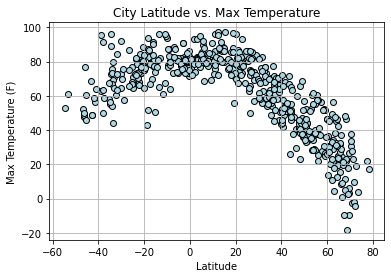

In [8]:
plt.scatter(x_latitude, city_weather_df["Max Temp"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("../output_data/max_temp")

The Latitude vs. Max Temperature plot shows the maximum temperatures for each city in the dataset, with 0 on the x-axis being the equator. The y-values are highest nearest x=0. As the x-axis values move away from zero in either direction, the y-axis values trend lower. 

## Latitude vs. Humidity Plot

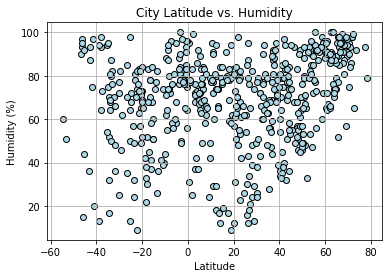

In [9]:
plt.scatter(x_latitude, city_weather_df["Humidity"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("../output_data/humidity")

The city latitude vs. humidity plot shows the percent humidity for each city in the dataset. The equator is represented by x=0. The scatter plot does not show any obvious trends.

## Latitude vs. Cloudiness Plot

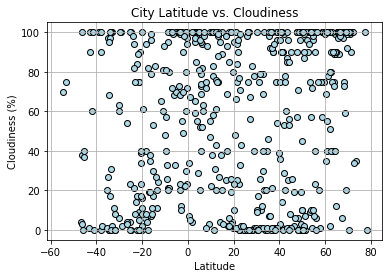

In [10]:
plt.scatter(x_latitude, city_weather_df["Cloudiness"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("../output_data/Cloudiness")

The latitude vs. cloudiness scatter plot shows the percent cloudiness for each city in the dataset, with the equator represented by x=0. There are no obvious trends related to the equator, however, it appears that many cities have cloudiness at extremes, with multiple points overlapping on y=0 and y=100.

## Latitude vs. Wind Speed Plot

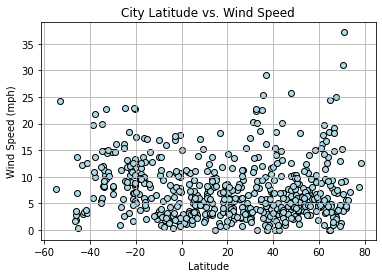

In [11]:
plt.scatter(x_latitude, city_weather_df["Wind Speed"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("../output_data/wind_speed")

The latitude vs. wind speed scatter plot shows the wind speed for each city in the dataset, with the equator represented by x=0. Most wind speeds appear to be y=10 or below. Some of the higher y values might be outliers.

## Linear Regression

In [12]:
#separate latitude into north (>=0) and south (<0) for x axes
x_north_lat = x_latitude.loc[x_latitude >= 0]
x_south_lat = x_latitude.loc[x_latitude < 0]

In [13]:
#set columns as variables for y axes
y_north_max_temp = city_weather_df["Max Temp"].loc[city_weather_df["Lat"] >= 0]
y_south_max_temp = city_weather_df["Max Temp"].loc[city_weather_df["Lat"] < 0]

y_north_humid = city_weather_df["Humidity"].loc[city_weather_df["Lat"] >= 0]
y_south_humid = city_weather_df["Humidity"].loc[city_weather_df["Lat"] < 0]

y_north_cloudy = city_weather_df["Cloudiness"].loc[city_weather_df["Lat"] >= 0]
y_south_cloudy = city_weather_df["Cloudiness"].loc[city_weather_df["Lat"] < 0]

y_north_wind_speed = city_weather_df["Wind Speed"].loc[city_weather_df["Lat"] >= 0]
y_south_wind_speed = city_weather_df["Wind Speed"].loc[city_weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.89047


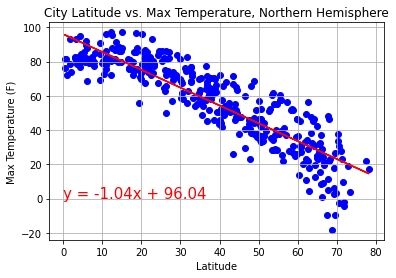

In [14]:
plt.scatter(x_north_lat, y_north_max_temp, facecolor="blue")
plt.title("City Latitude vs. Max Temperature, Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_max_temp)
regress_values = x_north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north_lat,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

plt.savefig("../output_data/north_max_temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.54718


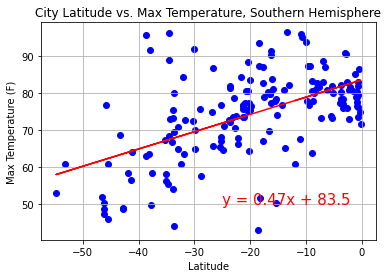

In [15]:
plt.scatter(x_south_lat, y_south_max_temp, facecolor="blue")
plt.title("City Latitude vs. Max Temperature, Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_max_temp)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

plt.savefig("../output_data/south_max_temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.34017


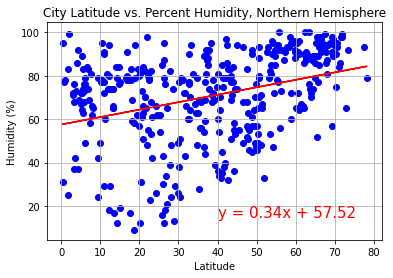

In [16]:
plt.scatter(x_north_lat, y_north_humid, facecolor="blue")
plt.title("City Latitude vs. Percent Humidity, Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_humid)
regress_values = x_north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north_lat,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

plt.savefig("../output_data/north_humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.14462


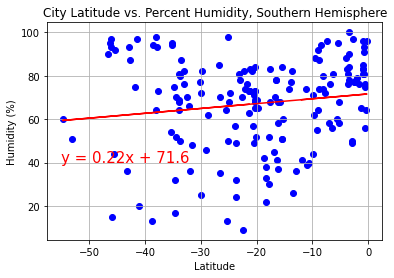

In [17]:
plt.scatter(x_south_lat, y_south_humid, facecolor="blue")
plt.title("City Latitude vs. Percent Humidity, Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_humid)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

plt.savefig("../output_data/south_humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.13661


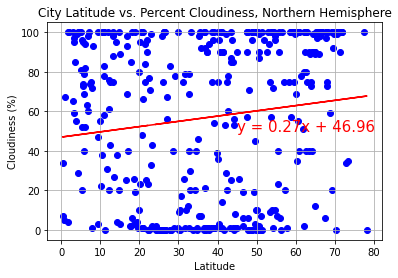

In [18]:
plt.scatter(x_north_lat, y_north_cloudy, facecolor="blue")
plt.title("City Latitude vs. Percent Cloudiness, Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_cloudy)
regress_values = x_north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north_lat,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

plt.savefig("../output_data/north_cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.21959


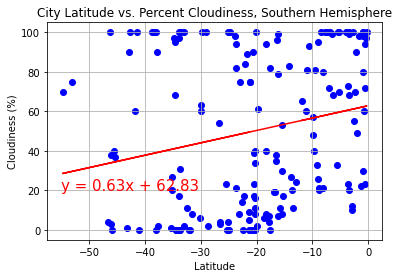

In [19]:
plt.scatter(x_south_lat, y_south_cloudy, facecolor="blue")
plt.title("City Latitude vs. Percent Cloudiness, Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_cloudy)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

plt.savefig("../output_data/south_cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.14545


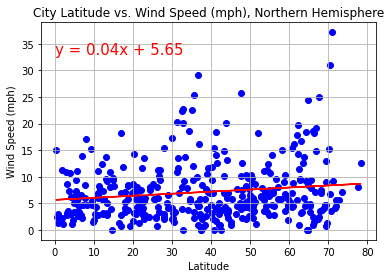

In [20]:
plt.scatter(x_north_lat, y_north_wind_speed, facecolor="blue")
plt.title("City Latitude vs. Wind Speed (mph), Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_wind_speed)
regress_values = x_north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north_lat,regress_values,"r-")
plt.annotate(line_eq,(0,33),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

plt.savefig("../output_data/north_wind_speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.23396


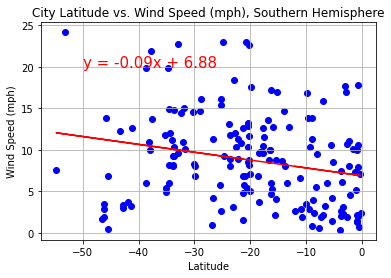

In [22]:
plt.scatter(x_south_lat, y_south_wind_speed, facecolor="blue")
plt.title("City Latitude vs. Wind Speed (mph), Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_wind_speed)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

plt.savefig("../output_data/south_wind_speed")